# RevLearn Analysis

## Setup Code (run before plotting)

In [3]:
# preparatory work
import utils
import pandas as pd
import numpy as np

# set up plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# make plots pretty
sns.set_style('darkgrid')
sns.set_context('talk', font_scale=1.4)
colors = sns.color_palette("Set2")

##Load data

In [4]:
### FILE LOCATION
datafile_path = 'data/revlearn.tsv'

df = pd.DataFrame.from_csv(datafile_path, sep='\t') # load .tsv into dataframe

## Clean and normalize data

In [5]:
df = utils.prepdata(df) # run preparations

# etimes are the event times in seconds.
# converts from soundtime (which is in Tobii clock time)
df = utils.timestamp_to_seconds(df, 'soundtime', 'etimes')

## Split data around two different events of interest

In [10]:
wascorr = list(df['correct'].dropna()==1)
wasinc = list(df['correct'].dropna()!=1)
where_corr = np.nonzero(wascorr)[0]
where_inc = np.nonzero(wasinc)[0]

# PARAMETERS
tpre = -0.3
tpost = 8
plottype = 1
smwid = 2

chunklist, idx = utils.evtsplit(df, df['etimes'], tpre, tpost)

norm_data = utils.basenorm(chunklist, idx, [float('-inf'), 0], 0)

norm_pupil_corr = norm_data[idx.get_loc('MeanPupil')][where_corr]
norm_pupil_inc = norm_data[idx.get_loc('MeanPupil')][where_inc]

## Plot

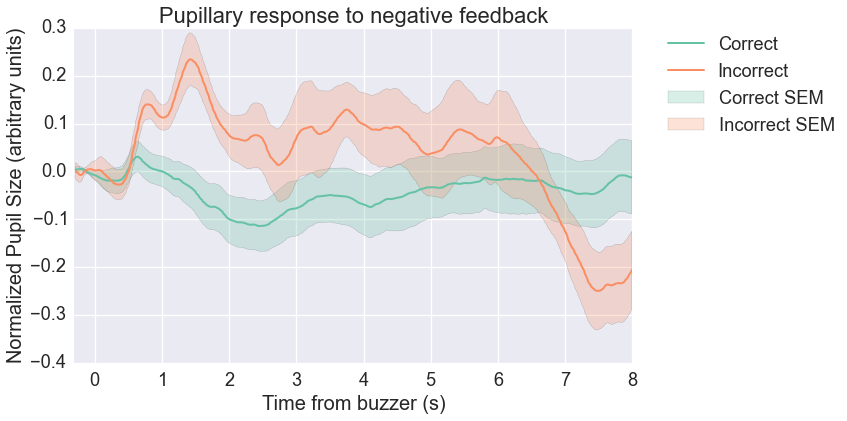

In [11]:
plt.figure(figsize=(10,6))
utils.plot_with_sem(norm_pupil_corr, smwid, plottype, norm_pupil_corr.index, colors[0])
utils.plot_with_sem(norm_pupil_inc, smwid, plottype, norm_pupil_inc.index, colors[1])
plt.xlim([tpre, tpost])
plt.title('Pupillary response to negative feedback');
plt.ylabel('Normalized Pupil Size (arbitrary units)');
plt.xlabel('Time from buzzer (s)');
if plottype == 0:
    plt.legend(['Correct', 'Incorrect'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
elif plottype == 1:
    plt.legend(['Correct', 'Incorrect', 'Correct SEM', 'Incorrect SEM'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
elif plottype == 2:
    plt.legend(['Correct', '', '', 'Incorrect'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
